# Module 2: Social Media Scraping Exercise

The purpose of this exercise is to familiarize you with social media scraping. We will use Twint for this in this exercise to...

1. Scrape Tweets from a specific user's account
2. Search tweets by keyword
3. Visualize the scraped results 

First, let's install Twint and related packages we will need.

In [ ]:
# install requirements

!pip3 install -q git+https://github.com/twintproject/twint.git@origin/master#egg=twint
!pip install -q nest_asyncio

     |████████████████████████████████| 263 kB 5.7 MB/s 
     |████████████████████████████████| 385 kB 46.0 MB/s 
     |████████████████████████████████| 288 kB 45.8 MB/s 
     |████████████████████████████████| 49 kB 3.5 MB/s 
     |████████████████████████████████| 59 kB 5.8 MB/s 
     |████████████████████████████████| 140 kB 48.3 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 


Then, we can import all of our Python libraries for processing, saving, and visualizing the social media data we will scrape.

In [ ]:
# import libraries

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
import re

import twint
import nest_asyncio

## 1. Scrape from an account
In a crisis context, there are often specific influential people whose social media content we may want to monitor. To do this we simply need to know that person's Twitter account handle. Let's take UNDP's Administrator Achim Steiner as an example.

As a first step, we need to obtain Administrator Steiner's Twitter handle and specify a day we wish to scrape tweets. We can also limit the amount of tweets we will get from Twint. Feel free to change this number and see how many tweets you get. 

In [ ]:
# define search parameters

account = 'ASteiner'
search_start_date = '2022-11-01'
number_of_tweets_to_scrape = 50

Here we finally get to the portion of our code where we will scrape the tweets. After we set up Twint, we pass our account we are interested in and the parameters we defined above into Twint. Then we can run our scrape. Depending on the number of tweets you wrote, you will see it may take some time to scrape the content. 

In [ ]:
# Scrape

# set up twint scraper
nest_asyncio.apply()
c = twint.Config()

# input search parameters
c.Username = account
c.Since = search_start_date
c.Limit = number_of_tweets_to_scrape

# save
c.Store_csv = True
c.Output = 'account_tweets.csv'
c.Pandas = True

# run scrape
twint.run.Search(c)

1590977635173027840 2022-11-11 08:00:01 +0000 <ASteiner> Gender inequality is both a driver and a consequence of conflict and crisis. @UNDP’s new #10PAA is a transformational approach which brings #GenderEquality to the center of our work in crisis settings.  https://t.co/TcUuW4mXvH
1590947435265675269 2022-11-11 06:00:01 +0000 <ASteiner> 568M people across sub-Saharan Africa - which represents three quarters of the world’s population - live w/o electricity.   Thru the Africa Minigrids Program, in Malawi, see how @UNDP is connecting communities to reliable, affordable and sustainable energy  https://t.co/2iWzW8NBIL
1590917235849269253 2022-11-11 04:00:01 +0000 <ASteiner> Climate change impacts men &amp; women differently. 80% of people displaced by climate change events are women.   @UNDP's #CitiesAlive report w @Arup &amp; @LivUni shows that #GenderEquality is a game changer for advancing sustainable cities and #SustDev. @Forbes  https://t.co/JyoG0ttaDL
1590897792423460864 2022-11-11 

The print out you see above is just to confirm the scrape is working. Now we need to read the scraped tweets into a Pandas dataframe for analysis. It is good practice to convert dates to datetime objects to ensure we can visualize our data over time accurately. 

In [ ]:
# save the scraped tweets to a pandas dataframe
tweets_by_account = twint.storage.panda.Tweets_df

# convert dates to datetime object 
tweets_by_account.date = pd.to_datetime(tweets_by_account.date)
tweets_by_account['date_only'] = tweets_by_account.date.dt.date

In [ ]:
tweets_by_account

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,date_only
0,1590977635173027840,1590977635173027840,1.668154e+12,2022-11-11 08:00:01,+0000,,Gender inequality is both a driver and a conse...,en,"[10paa, genderequality]",[],3232924232,3232924232,ASteiner,Achim Steiner,5,08,https://twitter.com/ASteiner/status/1590977635...,[https://www.undp.org/speeches/call-action-gen...,[],0,,False,11,2,8,,None,,,,,,,[],,,,,2022-11-11
1,1590947435265675269,1590947435265675269,1.668146e+12,2022-11-11 06:00:01,+0000,,568M people across sub-Saharan Africa - which ...,en,[],[],3232924232,3232924232,ASteiner,Achim Steiner,5,06,https://twitter.com/ASteiner/status/1590947435...,[https://stories.undp.org/light-is-life],[],0,,False,11,2,11,,None,,,,,,,[],,,,,2022-11-11
2,1590917235849269253,1590917235849269253,1.668139e+12,2022-11-11 04:00:01,+0000,,Climate change impacts men &amp; women differe...,en,"[citiesalive, genderequality, sustdev]",[],3232924232,3232924232,ASteiner,Achim Steiner,5,04,https://twitter.com/ASteiner/status/1590917235...,[https://www.forbes.com/sites/jamiehailstone/2...,[],0,,False,11,0,7,,None,,,,,,,[],,,,,2022-11-11
3,1590897792423460864,1590897792423460864,1.668135e+12,2022-11-11 02:42:45,+0000,,China is home to almost 10% of all plant speci...,en,"[china, fornature]",[],3232924232,3232924232,ASteiner,Achim Steiner,5,02,https://twitter.com/ASteiner/status/1590897792...,[https://undpinchina.exposure.co/wetlands-cons...,[https://pbs.twimg.com/media/FhQA7nIXwAIi-F5.jpg],1,https://pbs.twimg.com/media/FhQA7nIXwAIi-F5.jpg,False,11,0,3,,None,,,,,,,[],,,,,2022-11-11
4,1590864215576715264,1590864215576715264,1.668127e+12,2022-11-11 00:29:20,+0000,,"Great to meet w Ms. Azucena Arbeleche, Min. of...",en,"[climateaction, parisagreement, cop27]",[],3232924232,3232924232,ASteiner,Achim Steiner,5,00,https://twitter.com/ASteiner/status/1590864215...,[],[https://pbs.twimg.com/media/FhPhtULWAAApVfH.jpg],1,https://pbs.twimg.com/media/FhPhtULWAAApVfH.jpg,False,43,2,17,,None,,,,,,,[],,,,,2022-11-11
5,1590838311173902336,1590838311173902336,1.668120e+12,2022-11-10 22:46:24,+0000,,"A great pleasure to meet w @RaniaAlMashat, Min...",en,"[climatechange, cop27]",[],3232924232,3232924232,ASteiner,Achim Steiner,4,22,https://twitter.com/ASteiner/status/1590838311...,[],[https://pbs.twimg.com/media/FhPKqCMXoBYEVPX.jpg],1,https://pbs.twimg.com/media/FhPKqCMXoBYEVPX.jpg,False,14,2,6,,None,,,,,,,[],,,,,2022-11-10
6,1590836781649653762,1590836781649653762,1.668120e+12,2022-11-10 22:40:19,+0000,,One solution to boost #RenewableEnergy faster ...,en,"[renewableenergy, cop27]",[],3232924232,3232924232,ASteiner,Achim Steiner,4,22,https://twitter.com/ASteiner/status/1590836781...,[https://www.context.news/climate-justice/econ...,[https://pbs.twimg.com/media/FhPIyR-XoCUJG5S.jpg],1,https://pbs.twimg.com/media/FhPIyR-XoCUJG5S.jpg,False,20,5,11,,None,,,,,,,[],,,,,2022-11-10
7,1590833490437840904,1590833490437840904,1.668119e+12,2022-11-10 22:27:15,+0000,,"A great pleasure to meet with Xie Zhenhua, #Ch...",en,"[china, climateambition, sdgs, cop27]",[],3232924232,3232924232,ASteiner,Achim Steiner,4,22,https://twitter.com/ASteiner/status/1590833490...,[],[https://pbs.twimg.com/media/FhPGZKmXgAE5iAc.jpg],1,https://pbs.twimg.com/media/FhPGZKmXgAE5iAc.jpg,False,9,1,2,,None,,,,,,,[],,,,,2022-11-10
8,1590831447816163330,1590831447816163330,1.668119e+12,2022-11-10 22:19:08,+0000,,An excellent exchange w Marcos Prado Troyjo @M...,en,"[climateaction, sustainable, sdgs, cop27]",[],3232924232,3232924232,ASteiner,Achim Steiner,4,22,https://twitter.com/ASteiner/status/1590831447...,[],[https://pbs.twimg.com/media/FhPEn4lXoAk97Dt.j...,1,https://pbs.twimg.com/media/FhPEn4lXoAk97Dt.jpg,False,9,1,3,,None,,,,,,,[],,,,,2022-11-10
9,159

Let's take a look at how many tweets we get over the timeframe we selected.

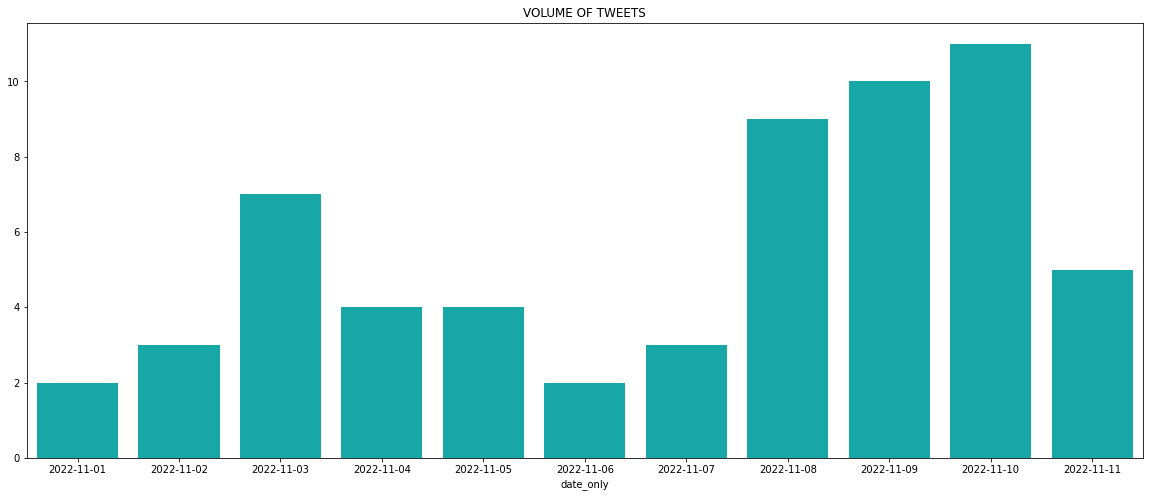

In [ ]:
# visualize the date range of tweets collected

tweets_by_day = tweets_by_account.groupby(['date_only']).count()['id']
plt.figure(figsize=(20,8))
sns.barplot(x=tweets_by_day.index,
            y=tweets_by_day.values,
            color='c')
plt.title('VOLUME OF TWEETS')
plt.show()

We may also be interested in knowing which tweet recieved the most likes.

In [ ]:
# tweet with the most likes
most_liked_tweet = tweets_by_account.loc[tweets_by_account.nlikes == tweets_by_account.nlikes.max()]
print('Most liked Tweet:')
most_liked_tweet['tweet'].item()

Most liked Tweet:


"#PakistanFloods left +33M people internally displaced. In my meeting w @BBhuttoZardari, 🇵🇰 MFA &amp; @G77_2022Chair, we discussed building a climate resilient future thru @UNDP+Govt of Pakistan's early recovery &amp; reconstruction program- including⬇️ the risks of climate change #COP27  https://t.co/4ggl3CjqpU"

### 👉 Exercise: Most retweeted tweet
Can you modify the code to find the most liked tweet so that it returns the most retweeted tweet?

The solution will be provided at a later date.

In [ ]:
############################
### WRITE YOUR CODE HERE ###
############################

Plotting the volume of tweets (or retweets in this example) over time is often a useful analysis since spikes in the number of tweets on a given day often correlate to important real-world events. 

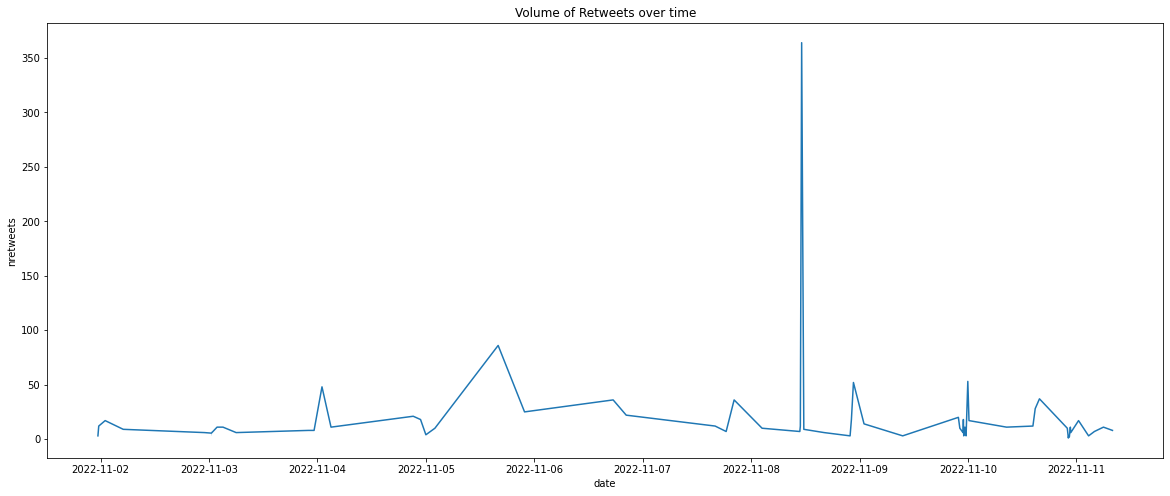

In [ ]:
# retweets over time
plt.figure(figsize=(20,8))
sns.lineplot(x=tweets_by_account.date,
             y=tweets_by_account.nretweets)
plt.title('Volume of Retweets over time')
plt.show()

## 2. Scrape based on keywords
The second part of the exercise walks through a very similar process to scrape tweets based on a set of user defined keywords. Defining these keywords typically requires some trial and error to determine what combination return the most useful tweets for your use case. Additionally, some subject matter expertise regarding the event or topic you wish to track is generally helpful in selecting the best set of keywords. 

Please feel free to change the keywords below to scrape tweets related to a recent event or topic you are working on or find interesting. If you input too many keywords, however, you may not scrape many tweets. It's good to start with a list of 2-4 keywords. 

In [ ]:
# define search parameters

keywords = ['elections', 'nigeria']
search_start_date = '2022-11-01'
number_of_tweets_to_scrape = 1000

The set up to scrape based on keywords is similar to scraping by username. We simply use the ```Search``` method instead of ```Username```.

In [ ]:
# Scrape

nest_asyncio.apply()
c = twint.Config()

# search params
c.Search = keywords
c.Since = search_start_date
c.Limit = number_of_tweets_to_scrape

# save
c.Store_csv = True
c.Output = 'account_tweets.csv'
c.Pandas = True

# run scrape
twint.run.Search(c)

1591104817564626944 2022-11-11 16:25:24 +0000 <TheNigeriaMan> I am really looking forward to Mr. Demola Olarewaju's tweet after Peter Obi defeats Atiku in 2023.  Baba go say na "In Politics, one thing Is certain, the imbalances of the Nigerian Elections since 1979 can be..😂😂😂💔
1591096580031283200 2022-11-11 15:52:40 +0000 <muslimnews_NG> The Abrahamic Mission holds interfaith summit in Ibadan, calls for peaceful, credible elections in 2023  The one-day summit was attended by representatives of various religious organisations, political parties, security agencies and INEC officials.   https://t.co/v2K3ZWj7O0
1591095190734848000 2022-11-11 15:47:09 +0000 <NBetLee> Do you think Peter Obi can win the elections in 2023 and become the next President of Nigeria?  If you stake ₦200,000 on Peter Obi To Win on  https://t.co/R6wveTKVM5, you will win ₦1,000,000  __ #NaijaBet Benin Vector Rufai Oseni  https://t.co/BUlXtqzmHD
1591095072002805764 2022-11-11 15:46:40 +0000 <NBetLee> Will Bola Tinubu w

Let's take a look at what we scraped with our keywords.

In [ ]:
# view the scraped tweets
tweets_by_keyword = twint.storage.panda.Tweets_df

# convert dates to datetime object 
tweets_by_keyword.date = pd.to_datetime(tweets_by_keyword.date)
tweets_by_keyword['date_only'] = tweets_by_keyword.date.dt.date

In [ ]:
tweets_by_keyword.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,date_only
0,1591104817564626944,1591104817564626944,1.668184e+12,2022-11-11 16:25:24,+0000,,I am really looking forward to Mr. Demola Olar...,en,[],[],1049277784420433920,1049277784420433920,TheNigeriaMan,Olá Rhodes-Vivour,5,16,https://twitter.com/TheNigeriaMan/status/15911...,[],[],0,,False,6,0,2,,"['elections', 'nigeria']",,,,,,,[],,,,,2022-11-11
1,1591096580031283200,1591096580031283200,1.668182e+12,2022-11-11 15:52:40,+0000,,The Abrahamic Mission holds interfaith summit ...,en,[],[],1045712019314409478,1045712019314409478,muslimnews_NG,Muslim News Nigeria,5,15,https://twitter.com/muslimnews_NG/status/15910...,[https://muslimnews.com.ng/2022/11/11/the-abra...,[],0,,False,3,0,2,,"['elections', 'nigeria']",,,,,,,[],,,,,2022-11-11
2,1591095190734848000,1591095190734848000,1.668182e+12,2022-11-11 15:47:09,+0000,,Do you think Peter Obi can win the elections i...,en,[naijabet],[],1534118659567894528,1534118659567894528,NBetLee,NBetLee,5,15,https://twitter.com/NBetLee/status/15910951907...,[http://www.naijabet.com],[https://pbs.twimg.com/media/FhS0pLAXEAA_oxm.jpg],1,https://pbs.twimg.com/media/FhS0pLAXEAA_oxm.jpg,False,3,0,2,,"['elections', 'nigeria']",,,,,,,[],,,,,2022-11-11
3,1591095072002805764,1591095072002805764,1.668182e+12,2022-11-11 15:46:40,+0000,,Will Bola Tinubu win the 2023 elections and be...,en,"[naijabet, leaked]",[],1534118659567894528,1534118659567894528,NBetLee,NBetLee,5,15,https://twitter.com/NBetLee/status/15910950720...,[http://www.naijabet.com],[https://pbs.twimg.com/media/FhS0iONXEAEEZ7-.jpg],1,https://pbs.twimg.com/media/FhS0iONXEAEEZ7-.jpg,False,0,0,0,,"['elections', 'nigeria']",,,,,,,[],,,,,2022-11-11
4,1591094664538357760,1591094664538357760,1.668182e+12,2022-11-11 15:45:03,+0000,,No More Postponement of Elections for Logistic...,en,[],[],957689427895242752,957689427895242752,_KingKazzy,Chef_Kazzy.eth (BCITWWW),5,15,https://twitter.com/_KingKazzy/status/15910946...,[https://shar.es/afCDn3],[],0,,False,1,1,1,,"['elections', 'nigeria']",,,,,,,[],,,,,2022-11-11


### 👉Exercise: Visualize the date range of tweets collected
Adapt the code from our example scraping tweets from Achim Steiner's account to visualize the volume of tweets we obtain scraping by your specific keywords.

Solution to be provided later.

In [ ]:
############################
### WRITE YOUR CODE HERE ###
############################

Let's look at the most liked tweet.

In [ ]:
# tweet with the most likes
most_liked_tweet_from_keywords = tweets_by_keyword.loc[tweets_by_keyword.nlikes == tweets_by_keyword.nlikes.max()]
print('Most liked Tweet:')
most_liked_tweet_from_keywords

Most liked Tweet:


,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,date_only
995,1589852267523739649,1589852267523739649,1.667885e+12,2022-11-08 05:28:13,+0000,,Allah will always make the impossible possible...,en,[],[],1487093520,1487093520,Abdulrahaman___,Abdullahi Ibrahim Bademan Zazzau.,2,05,https://twitter.com/Abdulrahaman___/status/158...,[],[https://pbs.twimg.com/media/FhBKNQLXwAAwFyo.jpg],1,https://pbs.twimg.com/media/FhBKNQLXwAAwFyo.jpg,False,3448,116,1017,,"['elections', 'nigeria']",,,,,,,[],,,,,2022-11-08


In [ ]:
# most like tweet text
most_liked_tweet_from_keywords['tweet'].item()

'Allah will always make the impossible possible.  Insha Allah Peter Obi will emerge victorious come 2023 elections.  Please help me retweet &amp; say Ameeen.  NNPP Kwankwaso Tinubu Northern Nigeria Tiwa Arise TV Aisha Mr Mugu  WANNA MAKE LOVE Reuben Abati Fulani Mr Bayo Kola Abiola  https://t.co/eeO41iN95I'

How about the volume of rewteets over time?

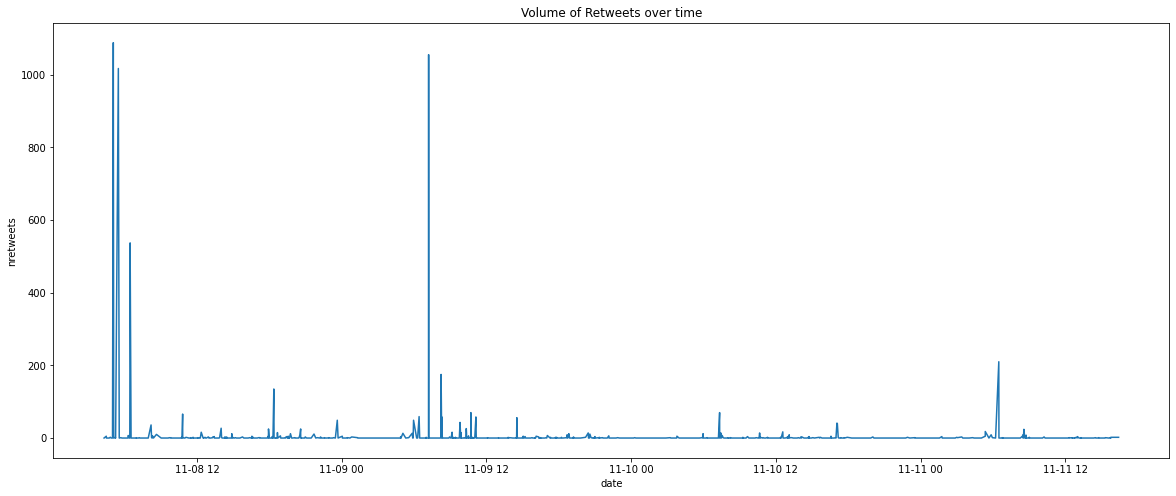

In [ ]:
# retweets over time
plt.figure(figsize=(20,8))
sns.lineplot(x=tweets_by_keyword.date,
             y=tweets_by_keyword.nretweets)
plt.title('Volume of Retweets over time')
plt.show()